In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def parse_if_number(s):
    try: return float(s)
    except: return True if s=="true" else False if s=="false" else s if s else None

def parse_ndarray(s):
    return np.fromstring(s, sep=' ') if s else None

def running_avg(x):
    return np.cumsum(x) / np.arange(1, x.size + 1)

def running_timeavg(t,x):
    dt = t[1:] - t[:-1]
    x = np.cumsum(x[:-1] * dt)
    y = t[1:]
    return [a/b for a,b in zip(x,y)]

# Caso servicio en DC

In [ ]:
#row = vec.iloc[0]
#delay_dc = pd.DataFrame(index=row.vectime, data={'delay' : row.vecvalue*1000})

#for i in range(1,len(vec)):
#    row = vec.iloc[i]
#    row = pd.DataFrame(index=row.vectime, data={'delay' : row.vecvalue*1000})
#    mean_delay_dc = pd.concat((mean_delay_dc, row))
#mean_delay_dc = mean_delay_dc.groupby(level=0).mean()

In [2]:
# Cargamos los datos
targetDcDelay = pd.read_csv("targetDcDelay.csv",converters = {
    'attrvalue': parse_if_number,
    'binedges': parse_ndarray,
    'binvalues': parse_ndarray,
    'vectime': parse_ndarray,
    'vecvalue': parse_ndarray})

# Filtramos end-to-end delay +  eliminamos los NaN
vec = targetDcDelay[(targetDcDelay.name == 'endToEndDelay:vector') & (targetDcDelay.type == "vector")].sort_values(["module"])
vec["vecvalue"] = vec["vecvalue"].apply(lambda x: x * 1000)

data = []
for i in range(0,len(vec)):
    row = vec.iloc[i]
    data.append([np.mean(row.vecvalue), np.std(row.vecvalue), np.min(row.vecvalue), np.max(row.vecvalue)])

#data
usersDcDelay = pd.DataFrame(data, columns = ["avg", "stddev", "min", "max"])
usersDcDelay

,avg,stddev,min,max
0,718.137940,2626.546836,191.948131,24248.168711
1,447.331729,587.824922,208.232155,3245.477212
2,466.717813,756.731509,200.879693,4903.377287
3,435.138500,542.434638,205.033035,3237.133121
4,461.655719,740.324017,194.986336,5489.079844
5,463.780548,890.682611,193.977707,8268.277911
6,507.026732,1080.868204,170.363119,8235.898265
7,555.716587,1194.170700,183.201849,9088.267170
8,350.897677,418.467459,194.230833,3222.601951
9,492.900608,850.471745,198.969199,6282.932549


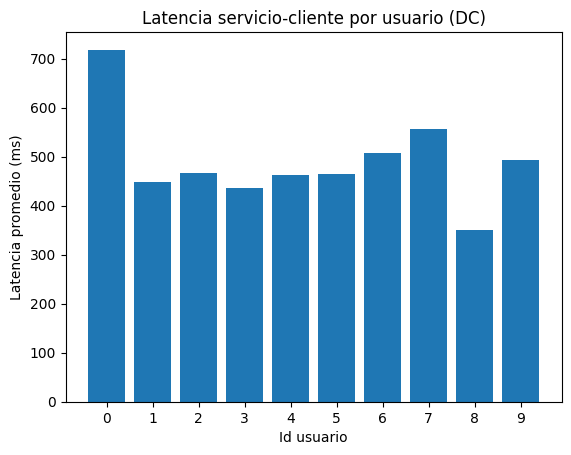

In [3]:
plt.title("Latencia servicio-cliente por usuario (DC)")
plt.ylabel("Latencia promedio (ms)")
plt.xlabel("Id usuario")
plt.bar(usersDcDelay.index, usersDcDelay.avg) #drawstyle='steps-post')
ax = plt.gca()
ax.set_xticks(range(0,10))
plt.show()

# Caso servicio en Fog

In [4]:
# Cargamos los datos
targetFogDelay = pd.read_csv("targetFogDelay.csv",converters = {
    'attrvalue': parse_if_number,
    'binedges': parse_ndarray,
    'binvalues': parse_ndarray,
    'vectime': parse_ndarray,
    'vecvalue': parse_ndarray})

# Filtramos end-to-end delay +  eliminamos los NaN
vec = targetFogDelay[(targetFogDelay.name == 'endToEndDelay:vector') & (targetFogDelay.type == "vector")].sort_values(["module"])
vec["vecvalue"] = vec["vecvalue"].apply(lambda x: x * 1000)

data = []
for i in range(0,len(vec)):
    row = vec.iloc[i]
    data.append([np.mean(row.vecvalue), np.std(row.vecvalue), np.min(row.vecvalue), np.max(row.vecvalue)])

#data
usersFogDelay = pd.DataFrame(data, columns = ["avg", "stddev", "min", "max"])
usersFogDelay

,avg,stddev,min,max
0,66.939767,128.976006,45.016984,1049.160035
1,67.116239,128.939656,45.023213,1051.448366
2,109.375073,326.406586,45.207604,3048.090759
3,102.772274,321.283862,45.461609,3053.162977
4,66.945416,129.143439,45.448396,1051.599737
5,92.355967,201.661072,45.016921,1053.146766
6,75.177096,157.621432,45.016839,1052.463388
7,117.820650,283.038046,45.964328,2048.493718
8,84.017164,180.595248,45.017038,1049.178411
9,58.293209,91.565344,45.023346,1048.492351


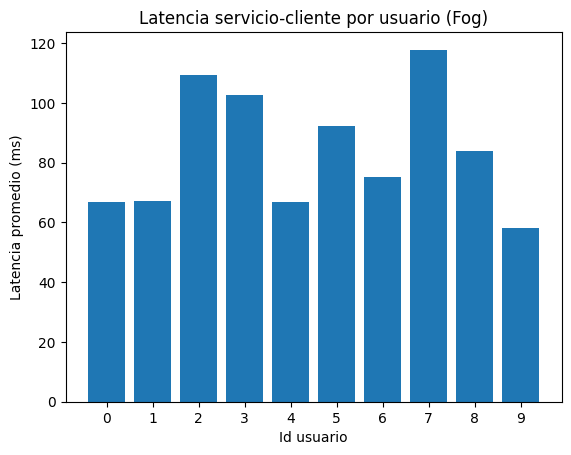

In [5]:
plt.title("Latencia servicio-cliente por usuario (Fog)")
plt.ylabel("Latencia promedio (ms)")
plt.xlabel("Id usuario")
plt.bar(usersFogDelay.index, usersFogDelay.avg) #drawstyle='steps-post')
ax = plt.gca()
ax.set_xticks(range(0,10))
plt.show()

# Comparativa Dc vs Fog

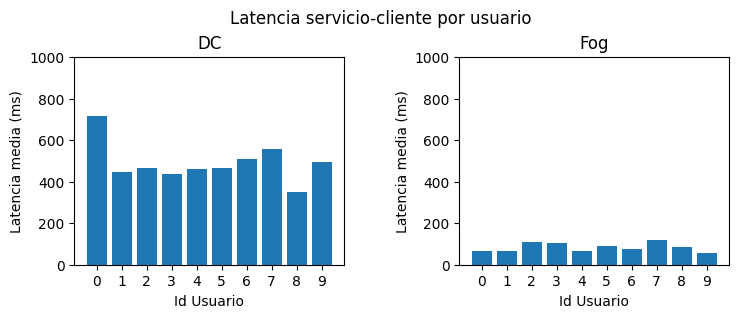

In [25]:
fig, (ax) = plt.subplots(1, 2, figsize=(4,3))
fig.suptitle('Latencia servicio-cliente por usuario')

fig.tight_layout()
fig.set_size_inches(8, 3)
#plt.ylabel("Latencia promedio (ms)")
#plt.xlabel("Id usuario")
ax[0].set_title("DC")
ax[1].set_title("Fog")

ax[0].bar(usersDcDelay.index, usersDcDelay.avg) #drawstyle='steps-post')
ax[1].bar(usersFogDelay.index, usersFogDelay.avg)

for x in ax:
    x.set_ylim(0,1000)
    x.set_xticks(range(0,10))
    x.set(xlabel='Id Usuario', ylabel='Latencia media (ms)')

# Estadísticas comparativas

In [11]:
usersDcDelay.describe()

,avg,stddev,min,max
count,10.000000,10.000000,10.000000,10.000000
mean,489.930385,968.852264,194.182206,7622.121402
std,95.960990,628.803921,10.936749,6243.601555
min,350.897677,418.467459,170.363119,3222.601951
25%,450.912726,625.949696,192.455525,3659.952230
50%,465.249180,803.601627,194.608585,5886.006196
75%,503.495201,1033.321805,200.402069,8260.183000
max,718.137940,2626.546836,208.232155,24248.168711


In [12]:
usersFogDelay.describe()

,avg,stddev,min,max
count,10.000000,10.000000,10.000000,10.000000
mean,84.081285,194.923069,45.219628,1550.523651
std,20.590019,85.877121,0.317462,849.627587
min,58.293209,91.565344,45.016839,1048.492351
25%,66.988121,129.017864,45.016997,1049.745900
50%,79.597130,169.108340,45.023279,1052.031562
75%,100.168198,262.693802,45.388198,1799.656980
max,117.820650,326.406586,45.964328,3053.162977
